In [5]:
import numpy as np
import os
import pandas as pd

# Load the .npz file
with np.load('cifar4-train.npz') as data:
    cifar4_data = dict(data.items())

print('It is a dictionary with keys:', list(cifar4_data.keys()))

It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [6]:
X=cifar4_data['overfeat']
y=cifar4_data['labels']
P=cifar4_data['pixels']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Split the train set in train and validate
X_tr, X_va, y_tr, y_va = train_test_split(
    X_tr, y_tr, test_size=0.2, random_state=0)

In [8]:
# Create a k-NN classifier with default values
# i set the # of componenents of the PCA to 87 because it represent the 85% of deviations
# I decide to use the PCA because we have much quicker processing with negligible reduction in accuracy (2% apprx)
pipe = Pipeline([
     ('PCA', PCA(n_components=87)),
        ('Dt', DecisionTreeClassifier())
        ])


# Fit to train data
pipe.fit(X_tr, y_tr)

# Evaluate on test set
accuracy = pipe.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.605


In [9]:
from sklearn.model_selection import ParameterGrid

max_depth = np.arange(1, 50) 


# Save accuracy on test set
test_scores_tr = []
test_scores_te = []

# to test the single parameter I use a for cycle

for i in range(25):
    # Set parameters
    pipe = Pipeline([
   
    ( 'PCA', PCA(n_components=87)),
        ('Dt', DecisionTreeClassifier(max_depth=max_depth[i]))])
    
    
    # Fit a k-NN classifier
    pipe.fit(X_tr, y_tr)

    # Save accuracy on test set
    #params_dict['accuracy'] = pipe.score(X_tr, y_tr)
    #params_dict['accuracy'] = pipe.score(X_va, y_va)
   
    # Save result
    test_scores_tr.append(pipe.score(X_tr, y_tr))
    test_scores_te.append(pipe.score(X_te, y_te))
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


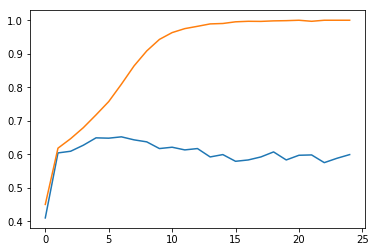

In [10]:
# I compare the train and validation accuracy

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

ax.plot(test_scores_te)
ax.plot(test_scores_tr)

plt.show()

In [11]:
scores_val=pd.DataFrame(test_scores_te, columns=['Validation'] )
scores_train=pd.DataFrame(test_scores_tr, columns=['Train'] )
scores=pd.concat([scores_val,scores_train], axis=1)
scores.head(10)

,Validation,Train
0,0.410,0.450313
1,0.604,0.618125
2,0.609,0.646563
3,0.627,0.679375
4,0.649,0.717500
5,0.648,0.757188
6,0.652,0.809063
7,0.643,0.863750
8,0.637,0.908438
9,0.617,0.942813


### We can clearly see the overfitting with the increase of the depth, I chose as depth 5

In [13]:
pipe = Pipeline([
   
    ( 'PCA', PCA(n_components=87)),
        ('Dt', DecisionTreeClassifier(max_depth=5))])
    
    
    # Fit the tuned decision tree
pipe.fit(X_tr, y_tr)

    #  result
    
print('Train Accuracy:',pipe.score(X_tr, y_tr))
print('Validation Accuracy:',pipe.score(X_va, y_va))

Train Accuracy: 0.7140625
Validation Accuracy: 0.64875


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier


pipeforest = Pipeline([
    ('PCA', PCA(n_components=87)),
    ('rf', RandomForestClassifier())
])

# Fit to train data
pipeforest.fit(X_tr, y_tr)

# Evaluate on test set
accuracy = pipeforest.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

C:\Users\erobbian\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 0.638


In [15]:
# Save accuracy on test set
test_scores_tr_forest = []
test_scores_te_forest = []
test_scores_va_forest = []

i=1
for i in range(10,521,50):
    # Set parameters
    pipeforest = Pipeline([
    ('PCA', PCA(n_components=87)),
    ('rf', RandomForestClassifier(n_estimators=i))])

    # Fit a k-NN classifier
    pipeforest.fit(X_tr, y_tr)

    # Save accuracy on test set
    #params_dict['accuracy'] = pipe.score(X_tr, y_tr)
    #params_dict['accuracy'] = pipe.score(X_va, y_va)
   
    # Save result
    test_scores_tr_forest.append(pipeforest.score(X_tr, y_tr))
    test_scores_te_forest.append(pipeforest.score(X_te, y_te))
    test_scores_va_forest.append(pipeforest.score(X_va, y_va))
    
    print(i)
    print(pipeforest.score(X_tr, y_tr))
    print(pipeforest.score(X_te, y_te))
    print(pipeforest.score(X_va, y_va))
    print('-------')


10
0.99625
0.641
0.675
-------
60
1.0
0.752
0.75375
-------
110
1.0
0.762
0.77625
-------
160
1.0
0.76
0.7525
-------
210
1.0
0.769
0.77125
-------
260
1.0
0.762
0.785
-------
310
1.0
0.774
0.78
-------
360
1.0
0.774
0.78375
-------
410
1.0
0.777
0.77875
-------
460
1.0
0.785
0.7775
-------
510
1.0
0.777
0.7725
-------


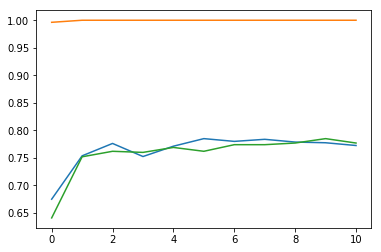

In [16]:
fig = plt.figure()
ax = plt.axes()

ax.plot(test_scores_va_forest)
ax.plot(test_scores_tr_forest)
ax.plot(test_scores_te_forest)

plt.show()

### as we can see from the resutls, with more than 110 estimators we have a strong deminishing of accuracy improvement

# fit tuned decision tree and random forest

In [17]:
# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [18]:
pipe = Pipeline([
   
    ( 'PCA', PCA(n_components=87)),
    ('Dt', DecisionTreeClassifier(max_depth=max_depth[5]))])
    
    
# Fit a k-NN classifier
pipe.fit(X_tr, y_tr)



print('Accuracy Decision Tree on Test:', pipe.score(X_te, y_te))

Accuracy Decision Tree on Test: 0.651


In [19]:
pipeforest = Pipeline([
    ('PCA', PCA(n_components=87)),
    ('rf', RandomForestClassifier(n_estimators=110))
])

# Fit to train data
pipeforest.fit(X_tr, y_tr)


print('Accuracy Random Forest Tree on Test:', pipeforest.score(X_te, y_te))

Accuracy Random Forest Tree on Test: 0.766
